In [1]:
import torch
import torch.nn as nn

# Supongamos que tenemos las siguientes probabilidades predichas y etiquetas verdaderas
# Etiquetas verdaderas (one-hot encoded)
y_true = torch.tensor([1, 0, 0], dtype=torch.float32)  # Clase 0
# Probabilidades predichas
y_pred = torch.tensor([0.7, 0.2, 0.1], dtype=torch.float32)

# Convertir a batch de tamaño 1
y_true = y_true.unsqueeze(0)
y_pred = y_pred.unsqueeze(0)

# Definir la función de pérdida de entropía cruzada
criterion = nn.CrossEntropyLoss()

# La función CrossEntropyLoss en PyTorch espera las etiquetas como índices
labels = torch.tensor([0])  # Clase 0

# Calcular la pérdida
loss = criterion(y_pred, labels)

print(f'Pérdida de entropía cruzada: {loss.item()}')


Pérdida de entropía cruzada: 0.7679495811462402


In [2]:
# Aplicar softmax a y_pred
softmax = nn.Softmax(dim=1)
y_pred_prob = softmax(y_pred)
# Calcular la pérdida
loss_manual = -torch.sum(y_true * torch.log(y_pred_prob))
print(f'Pérdida manual de entropía cruzada: {loss_manual.item()}')


Pérdida manual de entropía cruzada: 0.7679495811462402


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 19.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 615kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.46MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.49MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Época [1/5], Pérdida: 0.0249
Época [2/5], Pérdida: 0.0182
Época [3/5], Pérdida: 0.0136
Época [4/5], Pérdida: 0.0131
Época [5/5], Pérdida: 0.0109


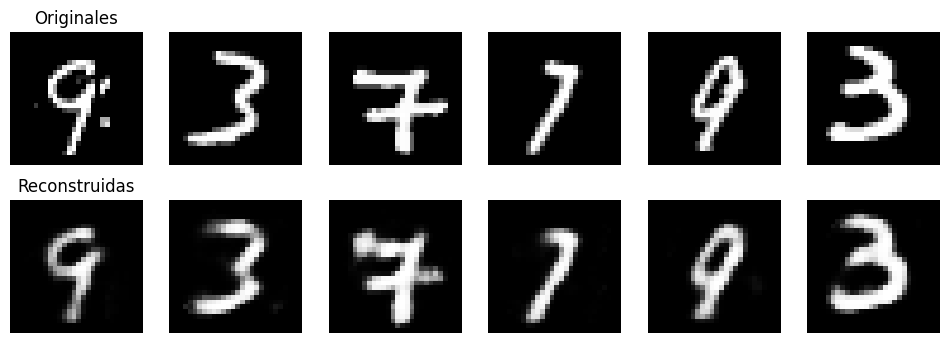

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Hiperparámetros
num_epochs = 5
batch_size = 128
learning_rate = 1e-3

# Dataset MNIST
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Definir el Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        z = self.encoder(x)
        x_recon = self.decoder(z)
        x_recon = x_recon.view(-1, 1, 28, 28)
        return x_recon

model = Autoencoder()

# Definir el optimizador y la función de pérdida
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Entrenamiento
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Época [{epoch+1}/{num_epochs}], Pérdida: {loss.item():.4f}')

# Visualización de resultados
import matplotlib.pyplot as plt

# Obtener algunas imágenes de prueba
test_images, _ = next(iter(train_loader))
reconstructed = model(test_images).detach()

# Mostrar imágenes originales y reconstruidas
fig, axes = plt.subplots(2, 6, figsize=(12, 4))
for i in range(6):
    axes[0, i].imshow(test_images[i].view(28, 28), cmap='gray')
    axes[1, i].imshow(reconstructed[i].view(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].axis('off')
axes[0, 0].set_title('Originales')
axes[1, 0].set_title('Reconstruidas')
plt.show()


In [4]:
import torch
import torch.nn as nn

def custom_cross_entropy(y_pred_logits, y_true_indices):
    softmax = nn.Softmax(dim=1)
    y_pred_prob = softmax(y_pred_logits)
    # Crear tensor one-hot de etiquetas verdaderas
    y_true_one_hot = torch.zeros_like(y_pred_prob)
    y_true_one_hot.scatter_(1, y_true_indices.unsqueeze(1), 1)
    # Calcular entropía cruzada
    loss = -torch.sum(y_true_one_hot * torch.log(y_pred_prob)) / y_pred_prob.size(0)
    return loss

# Datos de ejemplo
y_pred_logits = torch.tensor([[2.0, 1.0, 0.1]])
y_true_indices = torch.tensor([0])

# Pérdida personalizada
loss_custom = custom_cross_entropy(y_pred_logits, y_true_indices)

# Pérdida con CrossEntropyLoss
criterion = nn.CrossEntropyLoss()
loss_builtin = criterion(y_pred_logits, y_true_indices)

print(f'Pérdida personalizada: {loss_custom.item()}')
print(f'Pérdida CrossEntropyLoss: {loss_builtin.item()}')


Pérdida personalizada: 0.4170299768447876
Pérdida CrossEntropyLoss: 0.4170299470424652


In [5]:
# Supongamos que outputs son los logits del modelo
softmax = nn.Softmax(dim=1)
y_pred_prob = softmax(outputs)

# Calcular la entropía de las predicciones
entropy = -torch.mean(torch.sum(y_pred_prob * torch.log(y_pred_prob + 1e-10), dim=1))

# Pérdida original
loss = criterion(outputs, labels)

# Pérdida total con regularización de entropía
lambda_entropy = 0.1
loss_total = loss + lambda_entropy * entropy


NameError: name 'outputs' is not defined